In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.cluster import KMeans #hanya digunakan untuk menentukan elbow method, menentukan clusteringnya tanpa library
from scipy.spatial.distance import cdist

# **DATA PREPARATION**

---



In [ ]:
df = pd.read_csv("air_bnb.csv") #untuk model 1
data = pd.read_csv("air_bnb.csv") #untuk model 2

In [ ]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12316,18201775,Shiny Tegel,125640456,Fred,Reinickendorf,West 3,52.585051,13.300961,Private room,50,3,8,2017-07-15,0.44,1,0
12317,18202020,Panorama Hotel am Kurfürstendamm,86157833,Carina,Charlottenburg-Wilm.,Kurfürstendamm,52.503197,13.305658,Private room,30,1,1,2017-04-17,0.05,1,0
12318,18202888,Living at Körnerpark in a big sized room + Bal...,47469652,Tina,Neukölln,Neuköllner Mitte/Zentrum,52.471437,13.437660,Private room,25,5,9,2017-10-08,0.47,2,0
12319,18203481,Apartment in Kreuzberg Kottbusser Tor,125652413,Toni,Friedrichshain-Kreuzberg,nördliche Luisenstadt,52.498711,13.420887,Shared room,40,2,0,NaN,NaN,1,0


In [ ]:
#untuk model 1
del df['id']
del df['name']
del df['host_id']
del df['host_name']
del df['room_type']
del df['price']
del df['minimum_nights']
del df['number_of_reviews']
del df['last_review']
del df['reviews_per_month']
del df['calculated_host_listings_count']
del df['availability_365']

In [ ]:
df

,neighbourhood_group,neighbourhood,latitude,longitude
0,Mitte,Brunnenstr. Süd,52.534537,13.402557
1,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553
2,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579
3,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065
4,Pankow,Helmholtzplatz,52.543157,13.415091
...,...,...,...,...
12316,Reinickendorf,West 3,52.585051,13.300961
12317,Charlottenburg-Wilm.,Kurfürstendamm,52.503197,13.305658
12318,Neukölln,Neuköllner Mitte/Zentrum,52.471437,13.437660
12319,Friedrichshain-Kreuzberg,nördliche Luisenstadt,52.498711,13.420887


In [ ]:
#untuk model 2
del data['id']
del data['name']
del data['host_id']
del data['host_name']
# del data['room_type']
del data['latitude']
del data['longitude']
del data['neighbourhood']
del data['neighbourhood_group']
del data['minimum_nights']
del data['last_review']
# del data['reviews_per_month']
del data['calculated_host_listings_count']
del data['availability_365']

In [ ]:
data

,room_type,price,number_of_reviews,reviews_per_month
0,Entire home/apt,60,118,3.76
1,Private room,17,6,1.42
2,Entire home/apt,90,143,1.25
3,Private room,26,25,0.39
4,Private room,42,197,1.75
...,...,...,...,...
12316,Private room,50,8,0.44
12317,Private room,30,1,0.05
12318,Private room,25,9,0.47
12319,Shared room,40,0,NaN


In [ ]:
print(df.isnull().sum()) #melakukan pengecekan data apakah ada missing value untuk model 1

neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
dtype: int64


In [ ]:
print(data.isnull().sum()) #melakukan pengecekan data apakah ada missing value untuk model 2

room_type               0
price                   0
number_of_reviews       0
reviews_per_month    1836
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
atrib = pd.DataFrame(df)

In [ ]:
# preprocessing data, mengisi yang nilai datanya nul(terdapat missing value) untuk model 1
df_most_common_imputed = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df = df_most_common_imputed

In [ ]:
# preprocessing data, mengisi yang nilai datanya nul(terdapat missing value) untuk model 2
data_most_common_imputed = data.apply(lambda x: x.fillna(x.value_counts().index[0]))
data = data_most_common_imputed

In [ ]:
print(df.isnull().sum()) #melakukan pengecekan data apakah ada missing value, jika sudah tidak ada missing value bisa dilanjutkan ke proses normalisasi

neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
dtype: int64


In [ ]:
print(data.isnull().sum()) #melakukan pengecekan data apakah ada missing value, jika sudah tidak ada missing value bisa dilanjutkan ke proses normalisasi

room_type            0
price                0
number_of_reviews    0
reviews_per_month    0
dtype: int64


In [ ]:
from sklearn import preprocessing

In [ ]:
#atribut yang akan digunakan untuk clustering
X = df.loc[:,'latitude':'longitude'] #digunakan untuk model pertama
Y = data.loc[::,'number_of_reviews':'reviews_per_month'] #digunakan untuk model kedua #digunakan untuk model kedua

In [ ]:
#normalisasi data sehingga data ada di range yang sama
#attribut yang digunakan adalah latitude
#model 1
float_array = df['latitude'].values.astype(float)
float_array = float_array.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
df['latitude'] = scaled_array

In [ ]:
#normalisasi data sehingga data ada di range yang sama
#attribut yang digunakan adalah longitude
#model 1
float_array = df['longitude'].values.astype(float)
float_array = float_array.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
df['longitude'] = scaled_array

In [ ]:
# #normalisasi data sehingga data ada di range yang sama
# #attribut yang digunakan adalah numberOf_reviews
# #model 2
# float_array = data['reviews_per_month'].values.astype(float)
# float_array = float_array.reshape(-1,1)
# min_max_scaler = preprocessing.MinMaxScaler()
# scaled_array = min_max_scaler.fit_transform(float_array)
# data['reviews_per_month'] = scaled_array

In [ ]:
# #normalisasi data sehingga data ada di range yang sama
# #attribut yang digunakan adalah price
# #model 2
# float_array = data['number_of_reviews'].values.astype(float)
# float_array = float_array.reshape(-1,1)
# min_max_scaler = preprocessing.MinMaxScaler()
# scaled_array = min_max_scaler.fit_transform(float_array)
# data['number_of_reviews'] = scaled_array

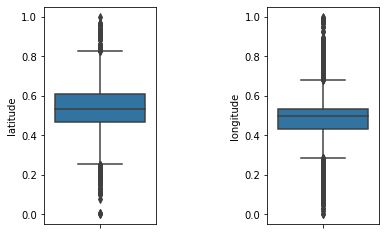

In [ ]:
#check apakah terdapat outliers pada data model 1
f, axes = plt.subplots(1, 2)
sns.boxplot(y=df["latitude"], ax=axes[0])
sns.boxplot(y=df["longitude"], ax=axes[1])
plt.subplots_adjust(wspace=1)

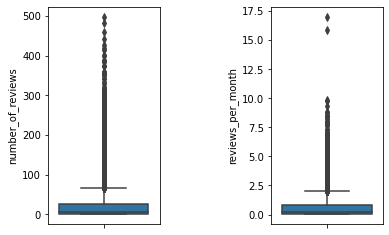

In [ ]:
#check apakah terdapat outliers pada data model 2
f, axes = plt.subplots(1, 2)
sns.boxplot(y=data["number_of_reviews"], ax=axes[0])
sns.boxplot(y=data["reviews_per_month"], ax=axes[1])
plt.subplots_adjust(wspace=1)

In [ ]:
#membersihkan outliers dengan metode Trimming model 1
index = df[(df['latitude'] >= 0.8525)|(df['latitude'] <= 0.275)].index
df.drop(index, inplace=True)
df['latitude'].describe()

index = df[(df['longitude'] >= 0.625)|(df['longitude'] <= 0.3)].index
df.drop(index, inplace=True)
df['longitude'].describe()

count    11549.000000
mean         0.481329
std          0.070560
min          0.300017
25%          0.439190
50%          0.498740
75%          0.530540
max          0.624725
Name: longitude, dtype: float64

In [ ]:
#handle outlier 
#latitude
#for model 2

qla1, qla3 = np.percentile(data['number_of_reviews'],[25,75])
iqrla = qla3 - qla1
lowerla = qla1 - (1.5 * iqrla)
upperla = qla3 + (1.5 * iqrla)
outlierla = data[(data['number_of_reviews'] < (lowerla)) | (data['number_of_reviews'] > (upperla))]
print('amount of outlier data',outlierla.shape[0] ) #amount of outlier data
idxla = data[(data['number_of_reviews'] < (lowerla)) | (data['number_of_reviews'] > (upperla))].index
# midla = np.median(clusterr['latitude'])
# clusterr.loc[idxla,'latitude'] = midla #impute with median
data.drop(idxla, inplace=True) #drop outlier data
data['number_of_reviews'].describe()
# print('mid',midla)


amount of outlier data 1481


count    10840.000000
mean        11.602952
std         15.195849
min          0.000000
25%          1.000000
50%          5.000000
75%         16.000000
max         66.000000
Name: number_of_reviews, dtype: float64

In [ ]:
#handle outlier 
#latitude
#for model 2

qla1, qla3 = np.percentile(data['reviews_per_month'],[25,75])
iqrla = qla3 - qla1
lowerla = qla1 - (1.5 * iqrla)
upperla = qla3 + (1.5 * iqrla)
outlierla = data[(data['reviews_per_month'] < (lowerla)) | (data['reviews_per_month'] > (upperla))]
print('amount of outlier data',outlierla.shape[0] ) #amount of outlier data
idxla = data[(data['reviews_per_month'] < (lowerla)) | (data['reviews_per_month'] > (upperla))].index
# midla = np.median(clusterr['latitude'])
# clusterr.loc[idxla,'latitude'] = midla #impute with median
data.drop(idxla, inplace=True) #drop outlier data
data['reviews_per_month'].describe()
# print('mid',midla)


amount of outlier data 899


count    9941.000000
mean        0.264038
std         0.294038
min         0.010000
25%         0.030000
50%         0.140000
75%         0.380000
max         1.240000
Name: reviews_per_month, dtype: float64

In [ ]:
#normalisasi data sehingga data ada di range yang sama
#attribut yang digunakan adalah reviews_per_month
#model 2
float_array = data['reviews_per_month'].values.astype(float)
float_array = float_array.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
data['reviews_per_month'] = scaled_array

In [ ]:
#normalisasi data sehingga data ada di range yang sama
#attribut yang digunakan adalah number_of_reviews
#model 2
float_array = data['number_of_reviews'].values.astype(float)
float_array = float_array.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
data['number_of_reviews'] = scaled_array

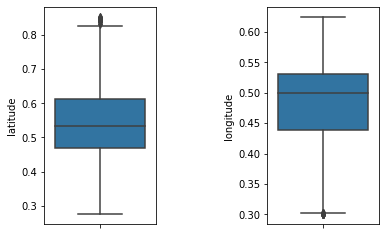

In [ ]:
#check apakah terdapat outliers pada data
f, axes = plt.subplots(1, 2)
sns.boxplot(y=df["latitude"], ax=axes[0])
sns.boxplot(y=df["longitude"], ax=axes[1])
plt.subplots_adjust(wspace=1)

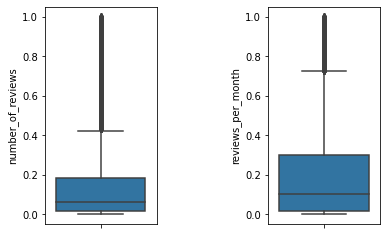

In [ ]:
#check apakah terdapat outliers pada data
f, axes = plt.subplots(1, 2)
sns.boxplot(y=data["number_of_reviews"], ax=axes[0])
sns.boxplot(y=data["reviews_per_month"], ax=axes[1])
plt.subplots_adjust(wspace=1)

In [ ]:
#encode 
from sklearn import preprocessing

encode = preprocessing.LabelEncoder()
df['neighbourhood_group'] = encode.fit_transform(df['neighbourhood_group'])
df['neighbourhood'] = encode.fit_transform(df['neighbourhood'])

df.head()

,neighbourhood_group,neighbourhood,latitude,longitude
0,3,12,0.617046,0.473039
1,5,54,0.662737,0.476337
2,5,57,0.618546,0.497864
3,8,67,0.500386,0.384637
4,5,26,0.645228,0.493753


In [ ]:
#encode 
from sklearn import preprocessing

encode = preprocessing.LabelEncoder()
data['room_type'] = encode.fit_transform(data['room_type'])

data.head()

,room_type,price,number_of_reviews,reviews_per_month
3,1,26,0.378788,0.308943
5,0,180,0.090909,0.113821
6,0,70,0.348485,0.178862
7,1,120,0.000000,0.016260
8,0,90,0.727273,0.373984


In [ ]:
#normalisasi data sehingga data ada di range yang sama
#attribut yang digunakan adalah neighbourhood_group
float_array = df['neighbourhood_group'].values.astype(float)
float_array = float_array.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
df['neighbourhood_group'] = scaled_array

In [ ]:
#normalisasi data sehingga data ada di range yang sama
#attribut yang digunakan adalah neighbourhood_group
float_array = df['neighbourhood'].values.astype(float)
float_array = float_array.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
df['neighbourhood'] = scaled_array

In [ ]:
#normalisasi data sehingga data ada di range yang sama
#attribut yang digunakan adalah price
float_array = data['price'].values.astype(float)
float_array = float_array.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
data['price'] = scaled_array

In [ ]:
#normalisasi data sehingga data ada di range yang sama
#attribut yang digunakan adalah room_type
float_array = data['room_type'].values.astype(float)
float_array = float_array.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
data['room_type'] = scaled_array

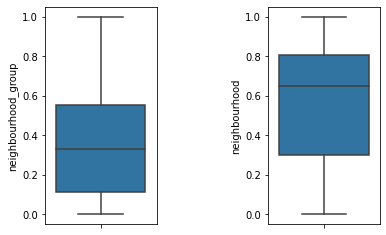

In [ ]:
#cek apakah terdapat outliers
f, axes = plt.subplots(1, 2)
sns.boxplot(y=df["neighbourhood_group"], ax=axes[0])
sns.boxplot(y=df["neighbourhood"], ax=axes[1])
plt.subplots_adjust(wspace=1)

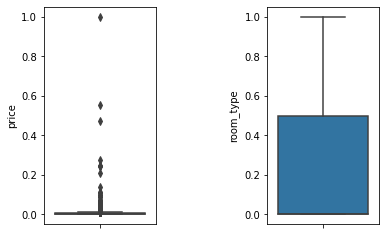

In [ ]:
#cek apakah terdapat outliers
f, axes = plt.subplots(1, 2)
sns.boxplot(y=data["price"], ax=axes[0])
sns.boxplot(y=data["room_type"], ax=axes[1])
plt.subplots_adjust(wspace=1)

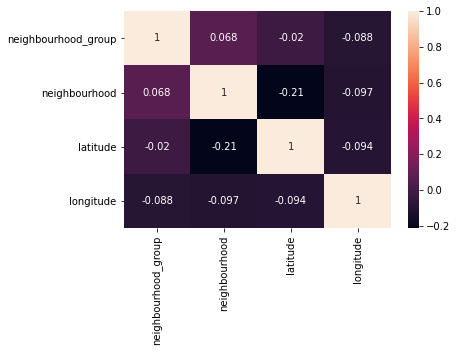

In [ ]:
#check correlation
sns.heatmap(df.corr(), vmax=1, annot=True)

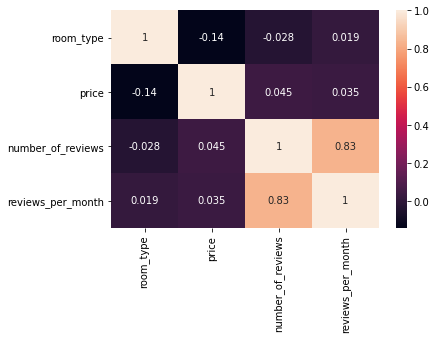

In [ ]:
#check correlation
sns.heatmap(data.corr(), vmax=1, annot=True)

# **CLUSTERING (WITH K MEANS)**

---



**MODEL 1**

*attribut yang digunakan adalah latitude dan longitude*

In [ ]:
#Menentukan nilai k yang paling optimal dengan elbow method
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 

K = range(1,10) 
  
for k in K: 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_


In [ ]:
#Print nilai dari masing masing k
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

1 : 0.0525676784316851
2 : 0.03836177462885551
3 : 0.030618624079741325
4 : 0.028543020900967535
5 : 0.024823818734704597
6 : 0.02272928160242673
7 : 0.020180901059286126
8 : 0.01945046598548009
9 : 0.018324454821725726


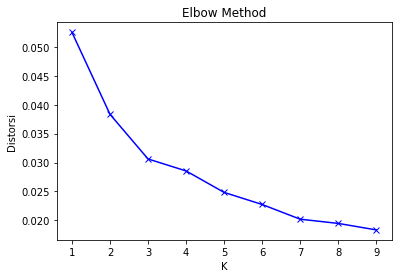

In [ ]:
# Plot grafik elbow method
plt.plot(K, distortions, 'bx-') 
plt.xlabel('K') 
plt.ylabel('Distorsi') 
plt.title('Elbow Method') 
plt.show() 

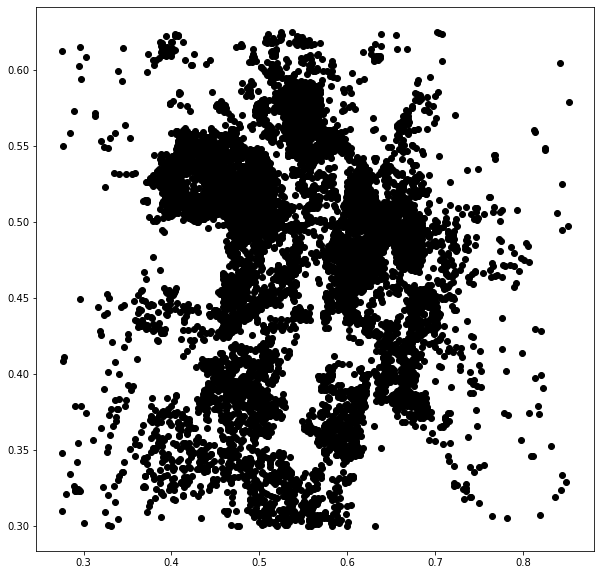

In [ ]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(df['latitude'], df['longitude'], color='k')

In [ ]:
#Memilih titik awal centroid sebanyak k
def pilih_centroids():
  k = 4
  inicentroid = {
      i + 1 : [random.choices(df['latitude']),random.choices(df['longitude'])]
      for i in range(k)
  }
  return inicentroid

In [ ]:
#Mengelompokkan data bedasarkan jarak terdekatnya dengan masing-masing centroid
def pengelompokan(df, centroids):
    for i in centroids.keys():
        df['jarak_{}'.format(i)] = (np.sqrt((df['latitude'] - centroids[i][0]) ** 2 + (df['longitude'] - centroids[i][1]) ** 2))
    
    jarak_centroid = ['jarak_{}'.format(i) for i in centroids.keys()]
    df['cluster'] = df.loc[:, jarak_centroid].idxmin(axis=1)
    df['cluster'] = df['cluster'].map(lambda x: int(x.lstrip('jarak_')))
    df['warna'] = df['cluster'].map(lambda x: colmap[x])

    return df

In [ ]:
#Menentukan titik centroid baru
def centroidBaru(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['cluster'] == i]['latitude'])
        centroids[i][1] = np.mean(df[df['cluster'] == i]['longitude'])
    return k

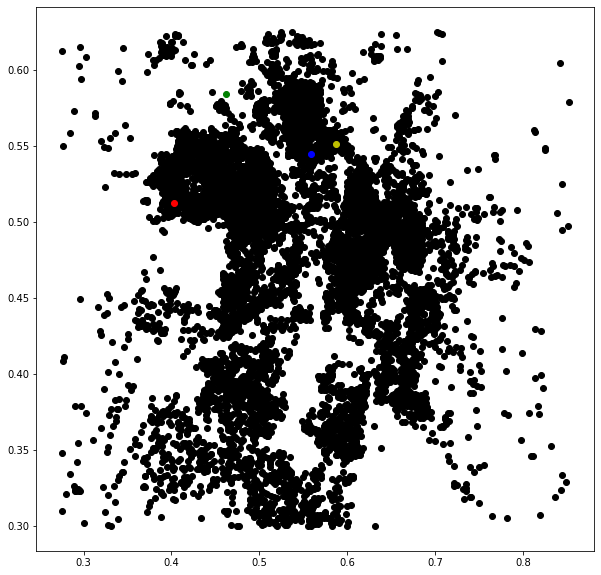

In [ ]:
#titik awal centroid
centroids = pilih_centroids()
fig = plt.figure(figsize=(10, 10))
plt.scatter(df['latitude'], df['longitude'], color='k')
colmap = {1: 'b', 2: 'y', 3: 'r', 4: 'g'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
# plt.xlim(0, 1)
# plt.ylim(0, 1)
plt.show()

In [ ]:
df = pengelompokan(df, centroids)

In [ ]:
df

,neighbourhood_group,neighbourhood,latitude,longitude,jarak_1,jarak_2,jarak_3,jarak_4,cluster,warna
0,0.333333,0.144578,0.617046,0.473039,0.092060,0.083650,0.217899,0.190730,2,y
1,0.555556,0.650602,0.662737,0.476337,0.124119,0.106487,0.262495,0.227873,2,y
2,0.555556,0.686747,0.618546,0.497864,0.075628,0.061911,0.216304,0.178764,2,y
3,0.888889,0.807229,0.500386,0.384637,0.170275,0.187544,0.160806,0.202977,3,r
4,0.555556,0.313253,0.645228,0.493753,0.100044,0.081792,0.243212,0.204339,2,y
...,...,...,...,...,...,...,...,...,...,...
12315,0.555556,0.915663,0.659476,0.561552,0.101901,0.073368,0.261409,0.198877,2,y
12316,0.666667,0.939759,0.782195,0.305140,0.327269,0.314051,0.432374,0.424658,2,y
12317,0.000000,0.373494,0.514581,0.312903,0.235822,0.248878,0.228707,0.276100,3,r
12318,0.444444,0.506024,0.410747,0.531051,0.148873,0.177249,0.020305,0.073540,3,r


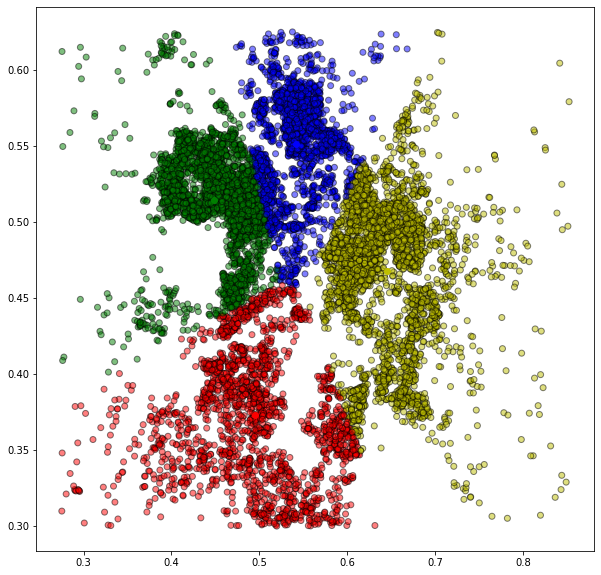

In [ ]:
#Mewarnai data sesuai pengelompokannya hingga nilai centroid selalu diperbarui dan tidak berubah lagi
cluster = []
while True:
    centroid_terdekat = df['cluster'].copy(deep=True)
    centroids = centroidBaru(centroids)
    df = pengelompokan(df, centroids)
#     cluster.append(df)
#     df['hasilcluster'] = cluster
    
    if centroid_terdekat.equals(df['cluster']):
        break

fig = plt.figure(figsize=(10, 10))
plt.scatter(df['latitude'], df['longitude'], color=df['warna'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
# plt.xlim(0, 1)
# plt.ylim(0, 1)
plt.show()

**MODEL 2**

*Sama-sama menggunakan kmeans tetapi attribut yang digunakan adalah number_of_reviews dan reviews_per_month*

In [ ]:
#Menentukan nilai k yang paling optimal dengan elbow method
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 

K = range(1,10) 
  
for k in K: 
    kmeanModel = KMeans(n_clusters=k).fit(Y) 
    kmeanModel.fit(Y)     
      
    distortions.append(sum(np.min(cdist(Y, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / Y.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_


In [ ]:
#Print nilai dari masing masing k
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

1 : 29.56917200613241
2 : 41.76245641981121
3 : 34.30000632187831
4 : 11.802798913216819
5 : 16.003889345634338
6 : 20.09867222181359
7 : 11.860251660717669
8 : 12.161182733964223
9 : 16.952423063632462


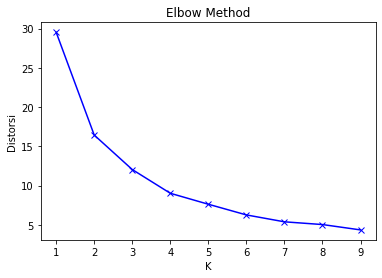

In [ ]:
# Plot grafik elbow method
plt.plot(K, distortions, 'bx-') 
plt.xlabel('K') 
plt.ylabel('Distorsi') 
plt.title('Elbow Method') 
plt.show() 

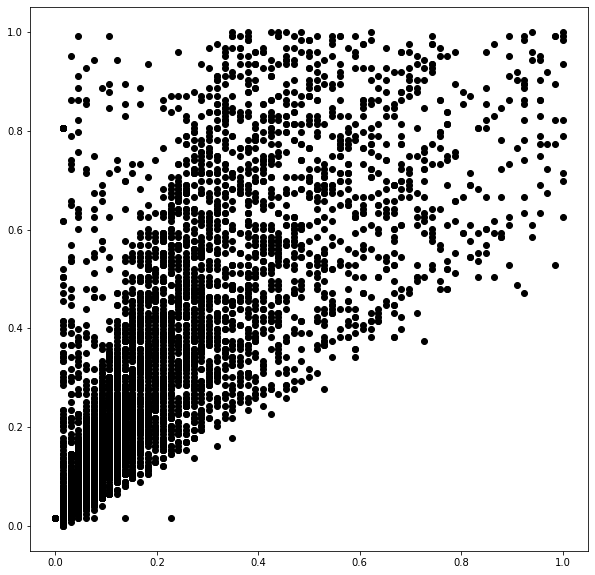

In [ ]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(data['number_of_reviews'], data['reviews_per_month'], color='k')

In [ ]:
#Memilih titik awal centroid sebanyak k
def pilih_centroids():
  k = 4
  inicentroid = {
      i + 1 : [random.choices(data['number_of_reviews']),random.choices(data['reviews_per_month'])]
      for i in range(k)
  }
  return inicentroid

In [ ]:
#Mengelompokkan data bedasarkan jarak terdekatnya dengan masing-masing centroid
def pengelompokan(data, centroids):
    for i in centroids.keys():
        data['jarak_{}'.format(i)] = (np.sqrt((data['number_of_reviews'] - centroids[i][0]) ** 2 + (data['reviews_per_month'] - centroids[i][1]) ** 2))
    
    jarak_centroid = ['jarak_{}'.format(i) for i in centroids.keys()]
    data['cluster'] = data.loc[:, jarak_centroid].idxmin(axis=1)
    data['cluster'] = data['cluster'].map(lambda x: int(x.lstrip('jarak_')))
    data['warna'] = data['cluster'].map(lambda x: colmap[x])

    return data

In [ ]:
#Menentukan titik centroid baru
def centroidBaru(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(data[data['cluster'] == i]['number_of_reviews'])
        centroids[i][1] = np.mean(data[data['cluster'] == i]['reviews_per_month'])
    return k


In [ ]:
data

,room_type,price,number_of_reviews,reviews_per_month
3,0.5,0.002002,0.378788,0.308943
5,0.0,0.019128,0.090909,0.113821
6,0.0,0.006895,0.348485,0.178862
7,0.5,0.012456,0.000000,0.016260
8,0.0,0.009119,0.727273,0.373984
...,...,...,...,...
12316,0.5,0.004671,0.121212,0.349593
12317,0.5,0.002447,0.015152,0.032520
12318,0.5,0.001891,0.136364,0.373984
12319,1.0,0.003559,0.000000,0.016260


In [ ]:
# #titik awal centroid
# centroids = pilih_centroids()
# fig = plt.figure(figsize=(10, 10))
# plt.scatter(data['number_of_reviews'], data['reviews_per_month'], color='k')
# colmap = {1: 'b', 2: 'y', 3: 'r', 4: 'g'}
# for i in centroids.keys():
#     plt.scatter(*centroids[i], color=colmap[i])
# plt.xlim(0, 1)
# plt.ylim(0, 1)
# plt.show()

In [ ]:
data = pengelompokan(data, centroids)

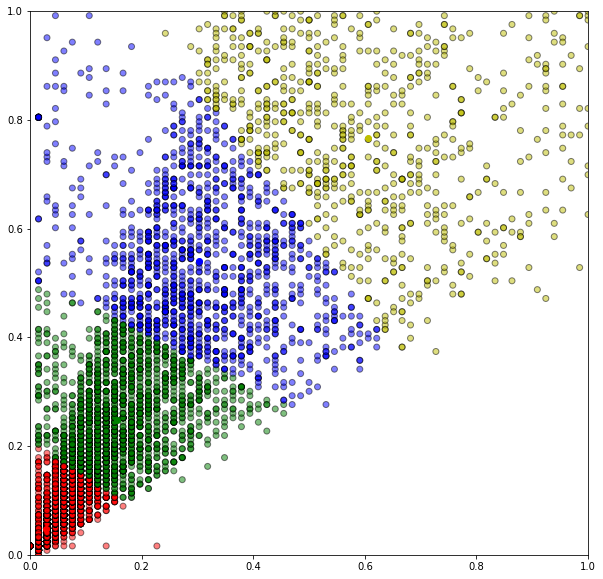

In [ ]:
#Mewarnai data sesuai pengelompokannya hingga nilai centroid selalu diperbarui dan tidak berubah lagi
cluster = []
while True:
    centroid_terdekat = data['cluster'].copy(deep=True)
    centroids = centroidBaru(centroids)
    data = pengelompokan(data, centroids)
#     cluster.append(df)
#     df['hasilcluster'] = cluster
    
    if centroid_terdekat.equals(data['cluster']):
        break

fig = plt.figure(figsize=(10, 10))
plt.scatter(data['number_of_reviews'], data['reviews_per_month'], color=data['warna'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

# **CLASSIFICATION**

---



In [ ]:
del df['warna']
del df['jarak_1']
del df['jarak_2']
del df['jarak_3']
del df['jarak_4']

In [ ]:
df

,neighbourhood_group,neighbourhood,latitude,longitude,cluster
0,0.333333,0.144578,0.617046,0.473039,2
1,0.555556,0.650602,0.662737,0.476337,2
2,0.555556,0.686747,0.618546,0.497864,2
3,0.888889,0.807229,0.500386,0.384637,3
4,0.555556,0.313253,0.645228,0.493753,2
...,...,...,...,...,...
12315,0.555556,0.915663,0.659476,0.561552,2
12316,0.666667,0.939759,0.782195,0.305140,2
12317,0.000000,0.373494,0.514581,0.312903,3
12318,0.444444,0.506024,0.410747,0.531051,4


In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split as tr
from sklearn.metrics import f1_score as f1
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import precision_score as pr
from sklearn.metrics import recall_score as rec

In [ ]:
fitur = pd.DataFrame({
    'latitude' : df["latitude"],
    'longitude': df["longitude"],
    'neighbourhood_group' : df["neighbourhood_group"],
    'neighbourhood' : df["neighbourhood"]
})

In [ ]:
kelas = df["cluster"]

In [ ]:
fitur.head()

,latitude,longitude,neighbourhood_group,neighbourhood
0,0.617046,0.473039,0.333333,0.144578
1,0.662737,0.476337,0.555556,0.650602
2,0.618546,0.497864,0.555556,0.686747
3,0.500386,0.384637,0.888889,0.807229
4,0.645228,0.493753,0.555556,0.313253


In [ ]:
kelas.head()

0    2
1    2
2    2
3    3
4    2
Name: cluster, dtype: int64

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
#splitting into training and testing
iris=load_iris()
fitur,kelas=iris.data,iris.target
ftrain,ftest,ktrain,ktest=tr(fitur,kelas,train_size=0.5,test_size=0.5,random_state=123)
#ktest

In [ ]:
ftrain.head()

,latitude,longitude,neighbourhood_group,neighbourhood
369,0.511331,0.523228,0.111111,0.987952
2165,0.674991,0.523449,0.555556,0.915663
4708,0.683009,0.471652,0.555556,0.650602
10570,0.448197,0.516896,0.444444,0.506024
10880,0.630754,0.468297,0.333333,0.144578


In [ ]:
ftest.head()

,latitude,longitude,neighbourhood_group,neighbourhood
3739,0.499800,0.539900,0.111111,1.000000
4714,0.681468,0.502560,0.555556,0.590361
942,0.471139,0.456888,0.111111,0.867470
10554,0.376173,0.446249,0.888889,0.855422
9859,0.696683,0.438379,0.333333,0.530120


In [ ]:
ktrain.head()

369      1
2165     2
4708     2
10570    4
10880    2
Name: cluster, dtype: int64

In [ ]:
ktest.head()

3739     1
4714     2
942      4
10554    4
9859     2
Name: cluster, dtype: int64

In [ ]:
# Create Decision Tree classifer object
dt = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
dt = dt.fit(ftrain,ktrain)

#Predict the response for test dataset
cd_predict = dt.predict(ftest)
print("Class Prediction\n")
for i in range(len(cd_predict)):
    print(cd_predict[i])

Class Prediction

1
2
4
4
2
2
1
3
2
4
3
4
4
1
1
3
4
2
3
2
4
2
3
2
1
3
4
3
1
1
4
4
1
2
4
3
2
4
3
4
1
1
4
2
3
4
1
4
3
4
3
1
4
4
4
2
2
3
4
4
2
4
4
3
4
4
4
1
4
2
4
2
2
4
2
4
2
2
2
4
2
2
4
3
2
2
3
2
2
4
2
2
2
1
2
1
1
2
1
3
2
4
4
2
1
3
4
2
2
2
4
1
2
1
2
3
2
2
2
2
2
4
2
4
2
4
3
3
3
4
4
2
3
3
4
3
2
2
4
3
2
2
1
1
2
2
2
2
3
2
2
3
2
2
2
2
1
4
3
2
2
2
1
4
1
4
2
3
4
4
4
3
4
2
2
4
2
1
1
4
2
4
4
2
2
2
1
1
2
4
3
4
1
2
1
2
2
2
3
4
4
1
4
2
4
1
3
4
1
4
2
3
3
2
2
2
4
4
4
2
2
3
2
2
2
2
2
4
3
2
2
3
4
3
3
2
2
4
4
1
2
1
4
2
4
2
4
2
2
2
3
4
1
4
2
4
4
4
2
2
1
1
3
3
1
2
3
2
2
3
3
3
1
3
3
3
4
2
2
4
4
4
2
3
2
4
4
2
2
3
1
4
4
1
4
4
2
4
2
4
2
2
2
4
1
1
1
2
4
3
4
1
4
2
4
4
1
3
3
1
1
4
4
1
4
4
1
2
1
1
4
4
4
2
1
3
2
4
2
1
1
3
2
4
3
1
2
4
2
4
4
2
1
3
3
2
1
1
1
4
2
1
2
2
4
2
2
4
2
4
2
4
3
1
1
4
1
3
2
1
2
2
2
3
4
3
2
2
2
4
2
4
1
3
1
4
3
1
2
2
1
4
4
2
4
4
2
1
4
1
4
2
1
1
3
4
2
1
2
1
4
2
3
3
3
2
2
1
2
4
2
4
4
1
2
4
2
3
2
1
2
2
2
3
4
2
2
2
2
1
1
1
3
3
2
1
3
2
1
2
2
1
4
2
4
4
1
2
4
1
3
1
3
2
4
2
2
2
4
2
3
3
4
4
1
1
4
1
4
4
2


Text(0, 0.5, 'Predictions')

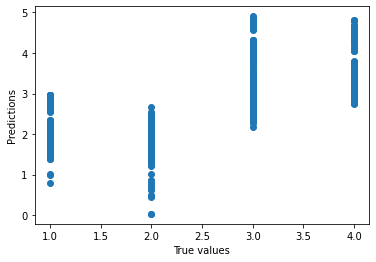

In [ ]:
from sklearn.linear_model import LinearRegression as lm

#We fit our model on the train data to make predictions on it. Let’s import the linear_model from sklearn, apply linear regression to the dataset, and plot the results.

model=lm().fit(ftrain,ktrain)
predictions=model.predict(ftest)
import matplotlib.pyplot as plt
plt.scatter(ktest,predictions)
plt.xlabel('True values')
plt.ylabel('Predictions')

In [ ]:
# Accuracy score
print("DECISION TREE\n")

print("F1-SCORE ",f1(ktest,cd_predict,average='macro'))

print("ACCURACY ",acc(ktest,cd_predict))

print("PRECISION ",pr(ktest,cd_predict,average='macro'))

print("RECALL",rec(ktest,cd_predict,average='macro'))

DECISION TREE

F1-SCORE  0.9497566576215142
ACCURACY  0.9528138528138528
PRECISION  0.9522633118071171
RECALL 0.947540149781787


In [ ]:
del data['warna']
del data['jarak_1']
del data['jarak_2']
del data['jarak_3']
del data['jarak_4']

In [ ]:
data

,room_type,price,number_of_reviews,reviews_per_month,cluster
3,0.5,0.002002,0.378788,0.308943,4
5,0.0,0.019128,0.090909,0.113821,3
6,0.0,0.006895,0.348485,0.178862,4
7,0.5,0.012456,0.000000,0.016260,3
8,0.0,0.009119,0.727273,0.373984,2
...,...,...,...,...,...
12316,0.5,0.004671,0.121212,0.349593,4
12317,0.5,0.002447,0.015152,0.032520,3
12318,0.5,0.001891,0.136364,0.373984,4
12319,1.0,0.003559,0.000000,0.016260,3


In [ ]:
fitur = pd.DataFrame({
    'number_of_reviews' : data["number_of_reviews"],
    'reviews_per_month': data["reviews_per_month"],
    'price' : data["price"],
    'room_type' : data["room_type"]
})

In [ ]:
fitur.head()

,number_of_reviews,reviews_per_month,price,room_type
3,0.378788,0.308943,0.002002,0.5
5,0.090909,0.113821,0.019128,0.0
6,0.348485,0.178862,0.006895,0.0
7,0.000000,0.016260,0.012456,0.5
8,0.727273,0.373984,0.009119,0.0


In [ ]:
kelas = df["cluster"]

In [ ]:
kelas.head()

0    2
1    2
2    2
3    3
4    2
Name: cluster, dtype: int64

In [ ]:
# #splitting into training and testing
# ftrain, ftest, ktrain, ktest = tr(fitur, kelas, test_size=0.2, random_state=1) # 80% data train, 20% data test

In [ ]:
iris=load_iris()
fitur,kelas=iris.data,iris.target
ftrain,ftest,ktrain,ktest=tr(fitur,kelas,train_size=0.5,test_size=0.5,random_state=123)
#ktest

In [ ]:
# Create Decision Tree classifer object
dt = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
dt = dt.fit(ftrain,ktrain)

#Predict the response for test dataset
cd_predict = dt.predict(ftest)
print("Class Prediction\n")
for i in range(len(cd_predict)):
    print(cd_predict[i])

Class Prediction

1
2
2
1
0
1
1
0
0
1
1
0
1
2
2
2
0
0
1
0
0
1
0
1
0
0
0
2
2
0
2
1
0
0
1
1
2
0
0
1
1
0
2
2
2
2
2
1
0
0
1
0
0
1
1
1
1
2
1
2
0
2
1
0
0
2
1
2
2
0
1
1
1
0
2


Text(0, 0.5, 'Predictions')

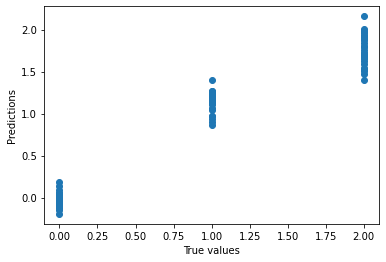

In [ ]:
from sklearn.linear_model import LinearRegression as lm

#We fit our model on the train data to make predictions on it. Let’s import the linear_model from sklearn, apply linear regression to the dataset, and plot the results.

model=lm().fit(ftrain,ktrain)
predictions=model.predict(ftest)
import matplotlib.pyplot as plt
plt.scatter(ktest,predictions)
plt.xlabel('True values')
plt.ylabel('Predictions')

In [ ]:
# Accuracy score
print("DECISION TREE\n")

print("F1-SCORE ",f1(ktest,cd_predict,average='macro'))

print("ACCURACY ",acc(ktest,cd_predict))

print("PRECISION ",pr(ktest,cd_predict,average='macro'))

print("RECALL",rec(ktest,cd_predict,average='macro'))

DECISION TREE

F1-SCORE  0.9027355623100304
ACCURACY  0.9066666666666666
PRECISION  0.9135802469135802
RECALL 0.9166666666666666
